# K-means Clustering for Customer Segmentation Analysis

Objective: <br>
Assume you work in the credit card department of a bank <br>
you job title is data scientist <br>

to understand the behaviors of the customers (credit card holders) and improve marketing  <br>
strategies, you may need to categorize the customers based on their characteristics <br>
(income, age, buying behavior, etc).

Find the clusters/groups that contain valuable customers:<br>
   e.g. high income but low annual spend

About the dataset <br>
The dataset consists of annual income (divided by \\$1000) and total spend (divided by \\$1000) of ~300 people for a period of one year. <br>
https://github.com/sowmyacr/kmeans_cluster

In [1]:
#Eliminating warnings from scikit-learn 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

## Dataset

In [3]:
dataset=pd.read_csv('Customers.csv') # read a table from the file

In [4]:
dataset.head() # show the first five rows of the table dataset

,income,spend,customer_ID
0,233,150,1
1,250,187,2
2,204,172,3
3,236,178,4
4,354,163,5


In [5]:
len(dataset) #the number of rows

303

In [6]:
type(dataset) # it is a dataframe of pandas to represent a table

pandas.core.frame.DataFrame

In [7]:
dataset.describe() #descriptive statistics of the dataset

,income,spend,customer_ID
count,303.000000,303.000000,303.000000
mean,245.273927,149.646865,152.000000
std,48.499412,22.905161,87.612784
min,126.000000,71.000000,1.000000
25%,211.000000,133.500000,76.500000
50%,240.000000,153.000000,152.000000
75%,274.000000,166.000000,227.500000
max,417.000000,202.000000,303.000000


The dataset consists of 303 rows. <br>
Each row is a feature vector of a customer <br>

For clustering, customer ID is not useful <br>
Therefore, we remove the ID column from the table

In [8]:
#input the name of the column to be droped
#set axis=1 to drop a column, set axis=0 to drop a row
#set inplace=True to modify the dataset
#more information: see the online document (google search pandas dataset)
dataset.drop(['customer_ID'], axis=1, inplace=True)

In [9]:
dataset.head()

,income,spend
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


Text(0.5, 1.0, 'spend(blue), income(red)')

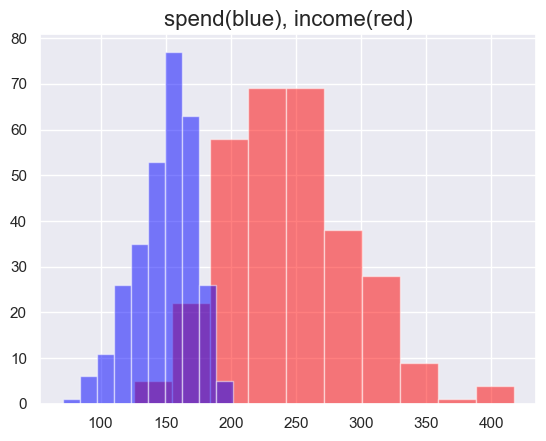

In [10]:
#show the distribution/histogram of income and spending
fig, ax = plt.subplots()
#set alpha=0.5 to make the figure to be transparent
ax.hist(dataset['income'], color='red', alpha=0.5)
ax.hist(dataset['spend'], color='blue', alpha=0.5)
ax.set_title('spend(blue), income(red)',fontsize=16)

Text(0, 0.5, 'spend')

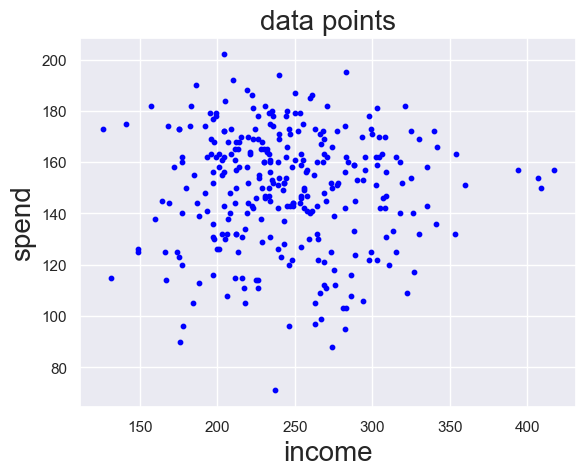

In [11]:
# Plotting the data points
fig, ax = plt.subplots()
ax.scatter(dataset['income'], dataset['spend'], c='blue', s=10)
ax.set_title('data points', fontsize=20)
ax.set_xlabel('income', fontsize=20)
ax.set_ylabel('spend', fontsize=20)

Each dot in the figure corresponds to a customer <br>
Each dot shows the feature vector of a customer <br>
In total, there are 303 dots/customers/vectors

## Clustering

The functions/methods in sk-learn work well on numpy array <br>
Some functions may crash if the input data type is pandas dataframe <br>
To avoid any potential problems, we convert pandas dataframe/table into numpy array 

In [12]:
data=dataset.values # convert pandas dataframe to numpy array
print('type is', type(data))
print('shape is', data.shape)

type is <class 'numpy.ndarray'>
shape is (303, 2)


In [13]:
data

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

### apply k-means

In [14]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=0) # define a machine learning model using Kmeans algorithm
model.fit(data) # run the algorithm/ fit the model to data
label=model.predict(data) # get the cluster label of each customer

In [15]:
label.shape # 303 labels for 303 customers/ rows in the table

(303,)

In [16]:
label

array([0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0,
       1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,

Text(0, 0.5, 'spend')

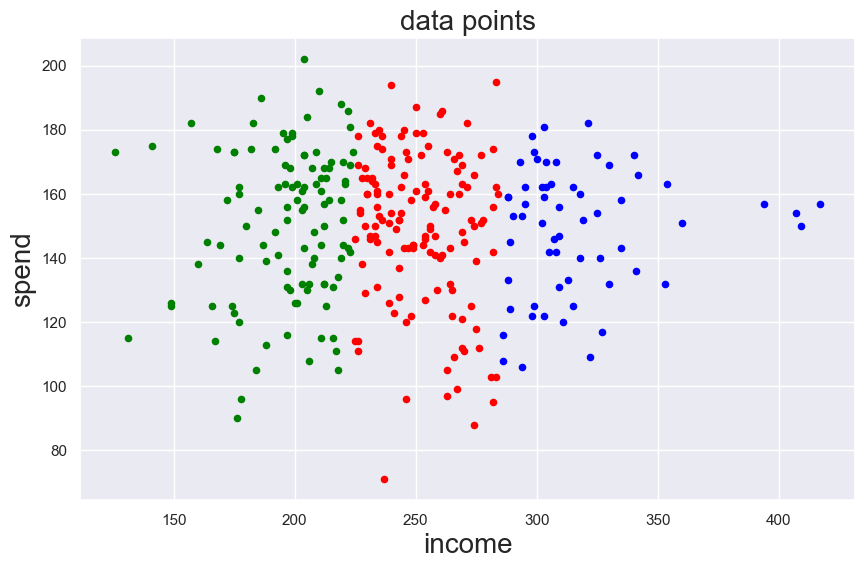

In [17]:
# visualize the clustering result (clusters 0,1,2)
# use red color to show customers in cluster-0
# use blue color to show customers in cluster-1
# use green color to show customers in cluster-2
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data[label==0, 0], data[label==0, 1], c='red', s=20)
ax.scatter(data[label==1, 0], data[label==1, 1], c='blue', s=20)
ax.scatter(data[label==2, 0], data[label==2, 1], c='green', s=20)
ax.set_title('data points', fontsize=20)
ax.set_xlabel('income', fontsize=20)
ax.set_ylabel('spend', fontsize=20)

Each cluster has a center

In [18]:
center=model.cluster_centers_
center

array([[251.61764706, 149.31617647],
       [317.55      , 148.73333333],
       [196.68224299, 150.57943925]])

We show the three centers together with the data points

Text(0, 0.5, 'spending')

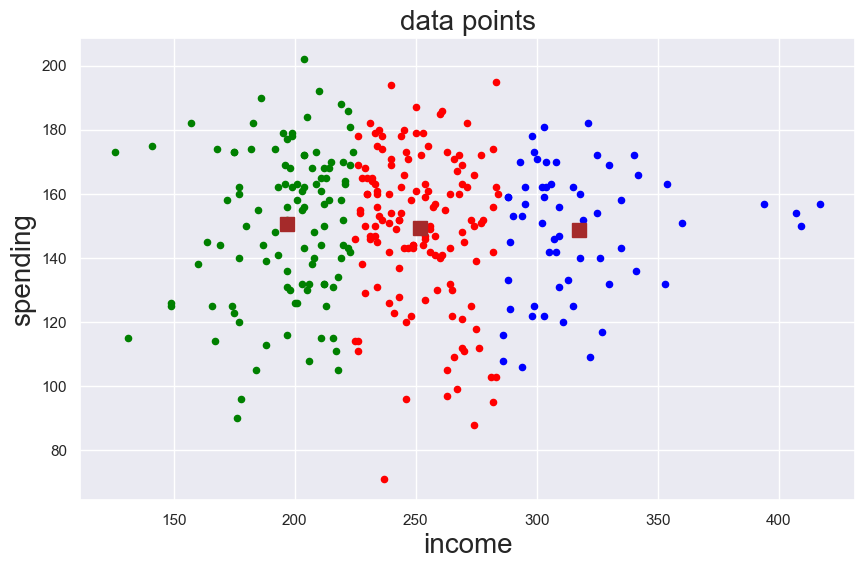

In [19]:
# visualize the clustering result (clusters 0,1,2)
# use red color to show customers in cluster-0
# use blue color to show customers in cluster-1
# use green color to show customers in cluster-3
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data[label==0, 0], data[label==0, 1], c='red', s=20)
ax.scatter(data[label==1, 0], data[label==1, 1], c='blue', s=20)
ax.scatter(data[label==2, 0], data[label==2, 1], c='green', s=20)
ax.plot(center[0,0], center[0,1], c='brown', marker='s', markersize=10)
ax.plot(center[1,0], center[1,1], c='brown', marker='s', markersize=10)
ax.plot(center[2,0], center[2,1], c='brown', marker='s', markersize=10)
ax.set_title('data points', fontsize=20)
ax.set_xlabel('income', fontsize=20)
ax.set_ylabel('spending', fontsize=20)

Cluster-0: the customers have low annual income
Cluster-1: the customers have medium annual income
Cluster-2: the customers have high annual income

### Using the elbow method to find the best number of clusters

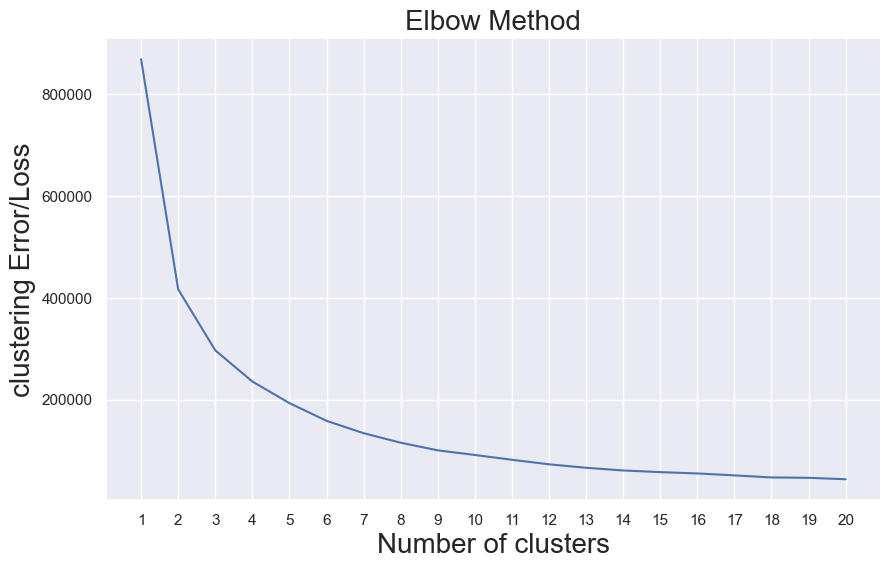

In [20]:
#Using the elbow method to find the ideal number of clusters
#apply k-means with different number of clusters
#study the relationship between error/loss of clustering and the number of clusters
from sklearn.cluster import KMeans
error_list = []
for K in range(1,21):
    model=KMeans(n_clusters=K, random_state=0)
    model.fit(data)
    error_list.append(model.inertia_)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,21), error_list)
ax.set_title('Elbow Method', fontsize=20)
ax.set_xlabel('Number of clusters', fontsize=20)
ax.set_ylabel('clustering Error/Loss', fontsize=20)
ax.set_xticks(range(1,21));

#### Elbow Method to choose the number clusters:
One should choose the number of clusters so that <br>
adding another new cluster doesn't significantly decrease clustering error/loss <br>
It is subjective because it depends on the judgement of the user. <br>
The user (me) thinks 6 clusters may be enough

In [21]:
#redo-clustering using 6 clusters
model=KMeans(n_clusters=6, random_state=0)
model.fit(data) # run the algorithm
label=model.predict(data) # get the cluster label of each customer
center=model.cluster_centers_ # get the 6 centers

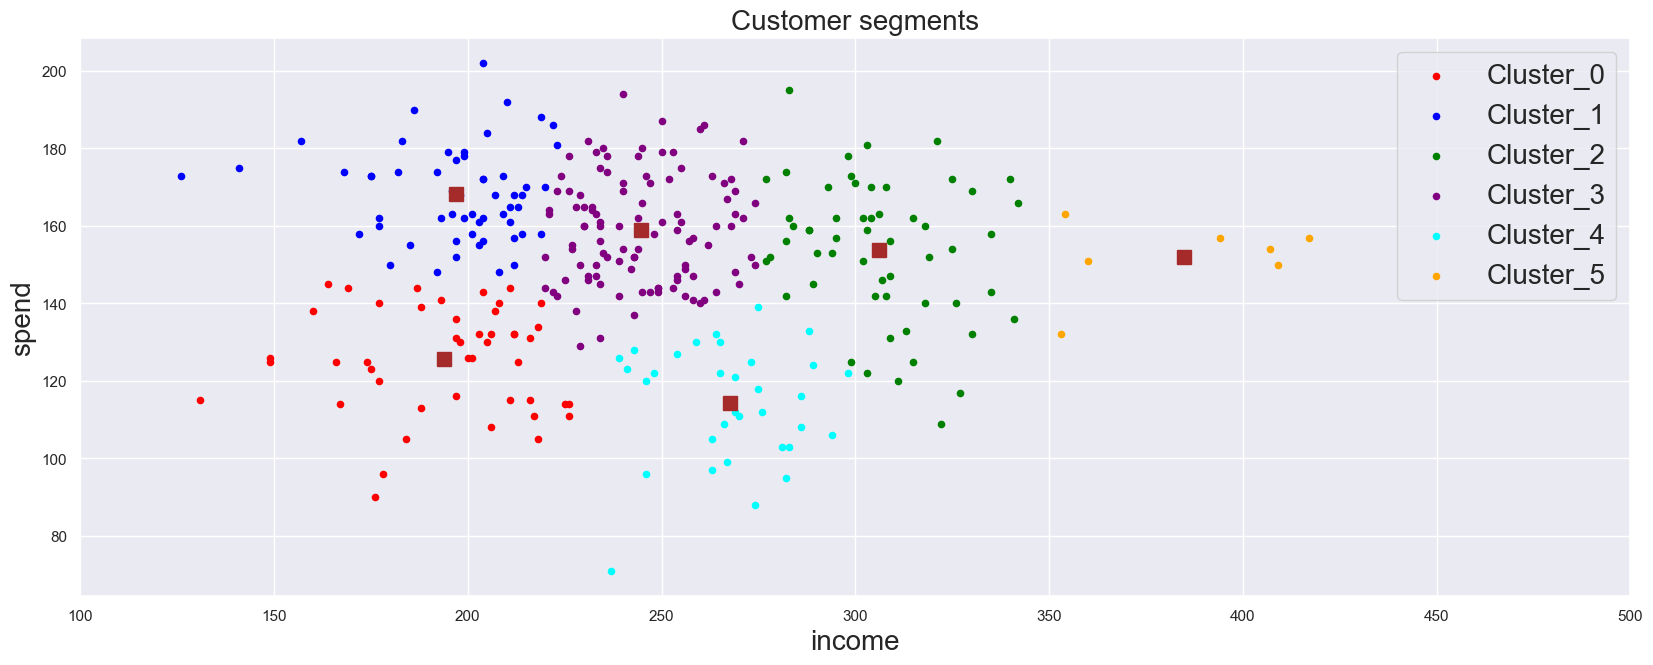

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
color=['red', 'blue', 'green', 'purple', 'cyan', 'orange']
for k in range(0, 6):
    ax.scatter(data[label==k, 0], data[label==k, 1], c=color[k], s=20, label='Cluster_'+str(k))
    ax.plot(center[k,0], center[k,1], c='brown', marker='s', markersize=10)
ax.set_title('Customer segments', fontsize=20)
ax.set_xlabel('income', fontsize=20)
ax.set_ylabel('spend', fontsize=20)
ax.set_xlim(100, 500)
ax.legend(fontsize=20)
ax.set_aspect('equal')

In [23]:
#basic idea: encourage people to spend more if they have money

### which cluster contains the most valuble customers?
Then you may improve your marketing strategy based on the clustering results <br>
This is a simplified application. In real applications, a customer will have more than two features.